FWHM:1.005 FSDP:2.125
./plot/SQ75B_fsdp.png


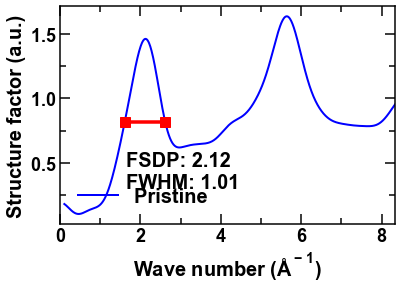

In [7]:
from matplotlib import pyplot as mp
import numpy as np
# import sys
# !{sys.executable} -m pip install -U ovito
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import numpy as np
import pandas as pd
import sys
import os
# !{sys.executable} -m pip install git+https://github.com/rajkubp020/fictive.git
%matplotlib inline

import fictive
from fictive import *

from sklearn import linear_model
from sklearn import linear_model
import sys
import os
def peak(x, c):
    return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = max(y)/2.0
    signs = np.sign(np.add(y, -half))
#     print(signs[1:-1])
    zero_crossings = (signs[0:-2] != signs[1:-1])
#     print(zero_crossings)
    zero_crossings_i = np.where(zero_crossings)[0]
    return [lin_interp(x, y, zero_crossings_i[0], half),
            lin_interp(x, y, zero_crossings_i[1], half)]

# # make some fake data
# x=np.linspace(0,9,201)
# y=np.sin(x)
file='SQ75B.csv'
sq=pd.read_csv(file,header=None,skiprows = 2)
    
sq.columns = ['a','b']
sq=sq.sort_values(by='a')
x=sq.a.to_numpy()
y=sq.b.to_numpy()

# find the two crossing points
hmx = half_max_x(x,y)

# print the answer
fwhm = hmx[1] - hmx[0]
x11=x[np.where(np.logical_and(x>=0, x<=hmx[1]))]
y11=y[np.where(np.logical_and(x>=0, x<=hmx[1]))]
fsdp=float(x11[y11==max(y11)][0])
fp=[fsdp ,max(y11)]
print("FWHM:{:.3f}".format(fwhm),"FSDP:{:.3f}".format(fsdp))


half = max(y)/2.0

plt.plot(x,y,'-b', label='Pristine  ')
plt.plot(hmx, [half, half],'s-r', lw=3.5)
txt=str("FSDP: {:.2f}".format(fsdp))+ '\n'+str("FWHM: {:.2f}".format(fwhm))
plt.xlabel('Wave number (Å$^-$$^1$)')
plt.ylabel('Structure factor (a.u.)') 
plt.text(half*2, .3,txt , fontsize=20)
plt.xlim([0, max(x)/3])
legend_on()
plt.legend(loc=3)
print('./plot/'+str(file.split('.')[0])+'_fsdp.png')
plt.savefig('./'+'_fsdp.png',dpi=200, bbox_inches='tight')


No handles with labels found to put in legend.


NameError: name 'squarefig' is not defined

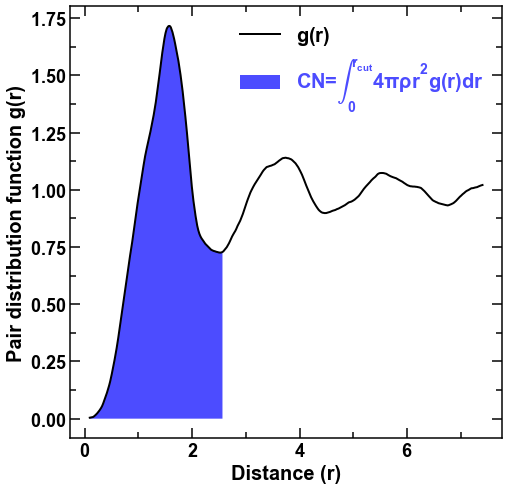

In [9]:
# fig, ax = plt.subplots()
fig, [ax] = panel(1,1)
legend_on(ax=ax)
# pd.read_csv('pdf_intial_62b.csv', header=None)[11].plot()
pdf=pd.read_csv('pdf_intial_62b.csv', header=None)#[[0,10]][200:]
# pdf[0]=pdf[0]-2
pdf1=pdf.rolling(window=50).mean()
# plt.plot(pdf1[0],pdf1[11])
# pdf[0],pdf[10]
pdf1=pdf1.dropna()[200:]
x=pdf1[0]-2.25
y=pdf1[11]
# plt.plot(pdf1[0],pdf1[11].rolling(window=20).mean())
# x,y=x.rolling(window=20).mean(),y.rolling(window=20).mean()
# plt.plot(x.rolling(window=20).mean(),y.rolling(window=20).mean())
from IPython.display import display, Math, Latex
# display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))
plt.plot(x.rolling(window=20).mean(),y.rolling(window=20).mean(),'k',label=r'$g(r)$')
plt.xlabel('Distance (r)')
plt.ylabel('Pair distribution function g(r)')
# plt.ylabel(r'$\int_0^y du/(1+u^{2})$')
# plt.ylabel()
# ax.text(0.18, 0.18, Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'), color="C0", fontsize=16)
pdf1[0]
limit=267
plt.fill_between(x.rolling(window=20).mean()[:limit],y.rolling(window=20).mean()[:limit],facecolor='b', alpha=0.7,label=r'CN=$\int_0^{ r_{cut}} {{4\pi\rho}r^{2}g(r)dr}$')


plt.legend(loc = "upper right",labelcolor='linecolor')
# plt.plot(x,y)
# legend_on()
squarefig(8)

y
plt.savefig('_Fig1_gr_CN.png',dpi=300,bbox_inches='tight')


